<a href="https://colab.research.google.com/github/AakritiGuragain/CNN/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Select GPU if available for faster training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cpu


In [ ]:
# -----------------------------
# DATA LOADING AND PREPROCESSING
# -----------------------------

# Convert images to tensors and normalize pixel values
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize grayscale values
])


In [ ]:
# Download MNIST dataset
train_dataset = torchvision.datasets.MNIST(
    root='./data', train=True, download=True, transform=transform)

test_dataset = torchvision.datasets.MNIST(
    root='./data', train=False, download=True, transform=transform)

# Create data loaders for batch processing
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=64, shuffle=True)

test_loader = torch.utils.data.DataLoader(
    test_dataset, batch_size=64, shuffle=False)


In [ ]:
# -----------------------------
# CNN MODEL DEFINITION
# -----------------------------

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()

        # First convolutional layer
        # Input: 1 channel (grayscale image)
        # Output: 16 feature maps
        # Kernel size: 3x3
        # Padding=1 keeps spatial dimensions same
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16,
                               kernel_size=3, padding=1)

        # Second convolutional layer
        # Takes 16 feature maps and outputs 32 feature maps
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)

        # Max pooling layer
        # Reduces spatial dimension by half (2x2 window)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer
        # After two pooling layers, image size becomes 7x7
        # 32 feature maps * 7 * 7 = 1568 neurons
        self.fc1 = nn.Linear(32 * 7 * 7, 128)

        # Output layer (10 classes for digits 0–9)
        self.fc2 = nn.Linear(128, 10)

        # ReLU activation introduces non-linearity
        self.relu = nn.ReLU()

    def forward(self, x):
        # Convolution -> ReLU -> Pooling
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Second Convolution -> ReLU -> Pooling
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Flatten feature maps into 1D vector
        x = x.view(-1, 32 * 7 * 7)

        # Fully connected layer with ReLU
        x = self.relu(self.fc1(x))

        # Final output layer (logits)
        x = self.fc2(x)

        return x

In [ ]:
def forward(self, x):
        # Convolution -> ReLU -> Pooling
        x = self.relu(self.conv1(x))
        x = self.pool(x)

        # Second Convolution -> ReLU -> Pooling
        x = self.relu(self.conv2(x))
        x = self.pool(x)

        # Flatten feature maps into 1D vector
        x = x.view(-1, 32 * 7 * 7)

        # Fully connected layer with ReLU
        x = self.relu(self.fc1(x))

        # Final output layer (logits)
        x = self.fc2(x)

        return x

In [ ]:
# Initialize model
model = SimpleCNN().to(device)

# -----------------------------
# LOSS FUNCTION AND OPTIMIZER
# -----------------------------

# CrossEntropyLoss is used for multi-class classification
criterion = nn.CrossEntropyLoss()

# Adam optimizer updates weights using adaptive learning rates
optimizer = optim.Adam(model.parameters(), lr=0.001)



In [ ]:
# -----------------------------
# TRAINING LOOP
# -----------------------------

epochs = 5

for epoch in range(epochs):
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        # Reset gradients from previous step
        optimizer.zero_grad()

        # Forward pass: compute predictions
        outputs = model(images)

        # Compute loss
        loss = criterion(outputs, labels)

        # Backpropagation: compute gradients
        loss.backward()

        # Update model parameters
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")


Epoch [1/5], Loss: 0.1957
Epoch [2/5], Loss: 0.0542
Epoch [3/5], Loss: 0.0371
Epoch [4/5], Loss: 0.0293
Epoch [5/5], Loss: 0.0224


In [ ]:
train_losses = []

for epoch in range(epochs):
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    train_losses.append(epoch_loss)   # ← VERY IMPORTANT
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss:.4f}")


Epoch [1/5], Loss: 0.0177
Epoch [2/5], Loss: 0.0148
Epoch [3/5], Loss: 0.0112
Epoch [4/5], Loss: 0.0098
Epoch [5/5], Loss: 0.0092


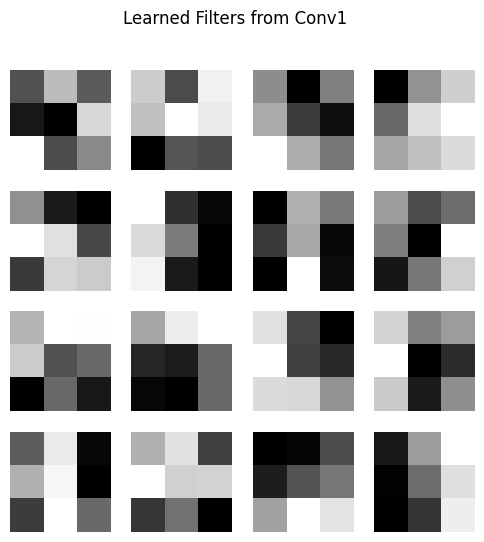

In [ ]:
# Extract filters from first convolutional layer
filters = model.conv1.weight.data.cpu()

fig, axes = plt.subplots(4, 4, figsize=(6,6))

for i, ax in enumerate(axes.flat):
    ax.imshow(filters[i][0], cmap='gray')
    ax.axis('off')

plt.suptitle("Learned Filters from Conv1")
plt.show()


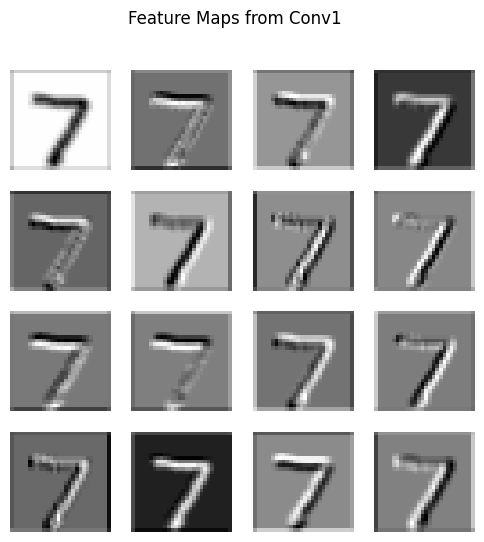

In [ ]:
model.eval()

dataiter = iter(test_loader)
images, labels = next(dataiter)

image = images[0:1].to(device)

with torch.no_grad():
    feature_maps = model.conv1(image)

feature_maps = feature_maps.cpu()

fig, axes = plt.subplots(4, 4, figsize=(6,6))

for i, ax in enumerate(axes.flat):
    ax.imshow(feature_maps[0][i], cmap='gray')
    ax.axis('off')

plt.suptitle("Feature Maps from Conv1")
plt.show()


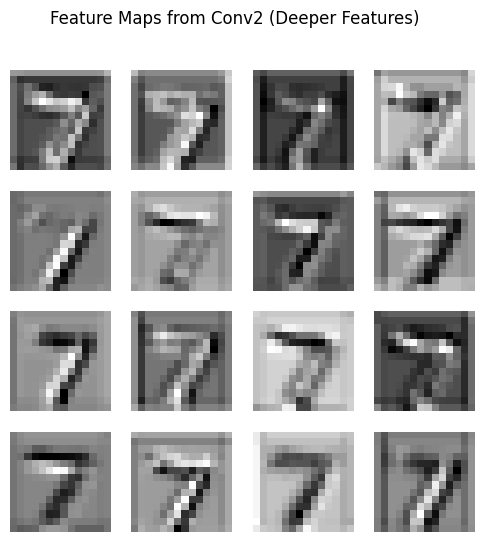

In [ ]:
with torch.no_grad():
    x = model.relu(model.conv1(image))
    x = model.pool(x)
    deeper_maps = model.conv2(x)

deeper_maps = deeper_maps.cpu()

fig, axes = plt.subplots(4, 4, figsize=(6,6))

for i, ax in enumerate(axes.flat):
    ax.imshow(deeper_maps[0][i], cmap='gray')
    ax.axis('off')

plt.suptitle("Feature Maps from Conv2 (Deeper Features)")
plt.show()
